In [357]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import scipy.stats as st


In [67]:
filepath = "NetflixDF4.csv"

In [69]:
# Read and display with pandas
df = pd.read_csv(filepath)
df.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [71]:
df.describe()

,release_year,duration
count,3558.000000,3558.000000
mean,2011.912591,103.275998
std,10.287760,26.900889
min,1942.000000,41.000000
25%,2010.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,119.000000
max,2021.000000,312.000000


In [73]:
df.shape

(3558, 8)

In [130]:
#locate top genres
df2 = df.loc[(df['genre'] == 'Dramas') | (df['genre'] == 'Comedies' ) | (df['genre'] == 'Documentaries') | (df['genre'] == 'Action & Adventure')| (df['genre'] == 'Children & Family Movies')| (df['genre'] == 'Stand-Up Comedy')| (df['genre'] == 'Horror Movies')]
df2.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0


In [238]:
#sort by longest movies
df3 = df2.sort_values('duration', ascending = False)
df3

,show_id,title,release_year,type,rating,country,genre,duration
1333,s4254,Black Mirror: Bandersnatch,2018,Movie,R,United States,Dramas,312.0
320,s1020,Lagaan,2001,Movie,PG,India,Dramas,224.0
1464,s4574,Jodhaa Akbar,2008,Movie,PG-13,India,Action & Adventure,214.0
1036,s3228,The Irishman,2019,Movie,R,United States,Dramas,209.0
871,s2732,Kabhi Khushi Kabhie Gham,2001,Movie,PG-13,India,Dramas,209.0
...,...,...,...,...,...,...,...,...
536,s1667,Alien Xmas,2020,Movie,PG,United States,Children & Family Movies,42.0
1275,s4093,Kevin James: Sweat the Small Stuff,2001,Movie,PG,United States,Stand-Up Comedy,42.0
706,s2200,The Speed Cubers,2020,Movie,PG,United States,Documentaries,41.0
1930,s5796,The White Helmets,2016,Movie,PG,United Kingdom,Documentaries,41.0


In [241]:
#sort by shortest movies
lowest = df2.sort_values('duration', ascending = True)
lowest

,show_id,title,release_year,type,rating,country,genre,duration
706,s2200,The Speed Cubers,2020,Movie,PG,United States,Documentaries,41.0
2683,s7168,Kalki,2017,Movie,PG-13,India,Dramas,41.0
1930,s5796,The White Helmets,2016,Movie,PG,United Kingdom,Documentaries,41.0
536,s1667,Alien Xmas,2020,Movie,PG,United States,Children & Family Movies,42.0
592,s1854,Rooting for Roona,2020,Movie,PG,India,Documentaries,42.0
...,...,...,...,...,...,...,...,...
871,s2732,Kabhi Khushi Kabhie Gham,2001,Movie,PG-13,India,Dramas,209.0
1036,s3228,The Irishman,2019,Movie,R,United States,Dramas,209.0
1464,s4574,Jodhaa Akbar,2008,Movie,PG-13,India,Action & Adventure,214.0
320,s1020,Lagaan,2001,Movie,PG,India,Dramas,224.0


In [242]:
#top 5 shortest movies
lowest_df = lowest.head()
lowest_df

,show_id,title,release_year,type,rating,country,genre,duration
706,s2200,The Speed Cubers,2020,Movie,PG,United States,Documentaries,41.0
2683,s7168,Kalki,2017,Movie,PG-13,India,Dramas,41.0
1930,s5796,The White Helmets,2016,Movie,PG,United Kingdom,Documentaries,41.0
536,s1667,Alien Xmas,2020,Movie,PG,United States,Children & Family Movies,42.0
592,s1854,Rooting for Roona,2020,Movie,PG,India,Documentaries,42.0


In [132]:
#calculate average duration by country
df2.groupby("country").mean()

,release_year,duration
country,,
India,2011.811644,126.493151
United Kingdom,2013.947059,96.611765
United States,2012.604597,94.167448


In [133]:
#create summary statistics table
df2.groupby("country")["duration"].agg(['mean','max','min','median','std','var'])

,mean,max,min,median,std,var
country,,,,,,
India,126.493151,224.0,41.0,127.0,25.205599,635.322239
United Kingdom,96.611765,208.0,41.0,97.0,23.877190,570.120215
United States,94.167448,312.0,41.0,94.0,21.472312,461.060169


In [134]:
#create India only data
india = df2[df2["country"] == "India"]
india.head()

,show_id,title,release_year,type,rating,country,genre,duration
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
20,s117,Dhanak,2015,Movie,PG,India,Comedies,114.0
22,s119,Gurgaon,2017,Movie,PG-13,India,Dramas,106.0


In [135]:
#create USA only dataframe
usa = df2[df2["country"] == "United States"]
usa.head()

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0


In [136]:
#create UK only dataframe
uk = df2[df2["country"] == "United Kingdom"]
uk.head()

,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90.0
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0
21,s118,Final Account,2021,Movie,PG-13,United Kingdom,Documentaries,94.0
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101.0
57,s178,The Guns of Navarone,1961,Movie,PG-13,United Kingdom,Action & Adventure,156.0


In [226]:
#sort by decending
us_df = usa.sort_values('duration',ascending=False)
us_df

,show_id,title,release_year,type,rating,country,genre,duration
1333,s4254,Black Mirror: Bandersnatch,2018,Movie,R,United States,Dramas,312.0
1036,s3228,The Irishman,2019,Movie,R,United States,Dramas,209.0
3294,s8328,The Gospel of Luke,2015,Movie,PG-13,United States,Dramas,205.0
3538,s8765,Wyatt Earp,1994,Movie,PG-13,United States,Action & Adventure,191.0
801,s2544,Unbreakable Kimmy Schmidt: Kimmy vs. the Reverend,2020,Movie,PG-13,United States,Comedies,190.0
...,...,...,...,...,...,...,...,...
536,s1667,Alien Xmas,2020,Movie,PG,United States,Children & Family Movies,42.0
2412,s6648,Dream Big: Engineering Our World,2017,Movie,G,United States,Documentaries,42.0
817,s2580,Go! Go! Cory Carson: The Chrissy,2020,Movie,PG,United States,Children & Family Movies,42.0
1275,s4093,Kevin James: Sweat the Small Stuff,2001,Movie,PG,United States,Stand-Up Comedy,42.0


In [227]:
#sort India df by desencing
india_df = india.sort_values('duration',ascending=False)
india_df

,show_id,title,release_year,type,rating,country,genre,duration
320,s1020,Lagaan,2001,Movie,PG,India,Dramas,224.0
1464,s4574,Jodhaa Akbar,2008,Movie,PG-13,India,Action & Adventure,214.0
871,s2732,Kabhi Khushi Kabhie Gham,2001,Movie,PG-13,India,Dramas,209.0
684,s2127,What's Your Raashee?,2009,Movie,PG,India,Comedies,203.0
870,s2731,Kabhi Alvida Naa Kehna,2006,Movie,PG-13,India,Dramas,192.0
...,...,...,...,...,...,...,...,...
3304,s8351,The Human Factor: The Untold Story of the Bomb...,2013,Movie,PG,India,Documentaries,53.0
3368,s8476,The Rat Race,2010,Movie,PG,India,Documentaries,52.0
499,s1543,Vir Das: Outside In - The Lockdown Special,2020,Movie,R,India,Stand-Up Comedy,50.0
592,s1854,Rooting for Roona,2020,Movie,PG,India,Documentaries,42.0


In [228]:
#sort UK dataframe by decending
uk_df=uk.sort_values('duration', ascending=False)
uk_df

,show_id,title,release_year,type,rating,country,genre,duration
833,s2633,No Direction Home: Bob Dylan,2005,Movie,R,United Kingdom,Documentaries,208.0
2139,s6145,American Honey,2016,Movie,R,United Kingdom,Dramas,163.0
3293,s8327,The Gospel of John,2014,Movie,PG-13,United Kingdom,Dramas,161.0
682,s2121,Les Misérables,2012,Movie,PG-13,United Kingdom,Dramas,158.0
1386,s4432,Dhan Dhana Dhan Goal,2007,Movie,PG-13,United Kingdom,Dramas,157.0
...,...,...,...,...,...,...,...,...
2577,s6979,Hitler's Olympics,2016,Movie,PG,United Kingdom,Documentaries,44.0
1804,s5467,The Mitfords: A Tale of Two Sisters,2017,Movie,PG,United Kingdom,Documentaries,44.0
1798,s5452,Jackie: A Tale of Two Sisters,2017,Movie,PG,United Kingdom,Documentaries,44.0
1795,s5449,Amelia: A Tale of Two Sisters,2017,Movie,PG,United Kingdom,Documentaries,44.0


In [140]:
#obtain durations
durations_usa = usa['duration']
durations_usa

0        90.0
1       125.0
2       104.0
4       103.0
5        97.0
        ...  
3549    113.0
3550     94.0
3551     88.0
3555     88.0
3556     88.0
Name: duration, Length: 2132, dtype: float64

In [141]:
# Demonstrate calculating measures of central tendency
usa_mean = np.mean(durations_usa)
print(f"The mean duration of Movies in the USA is {usa_mean}")

usa_median= np.median(durations_usa)
print(f"The median duration of Movies in the USA is {usa_median}")

usa_mode = st.mode(durations_usa)
print(f"The mode duration of Movies in the USA is {usa_mode}")

The mean duration of Movies in the USA is 94.16744840525328
The median duration of Movies in the USA is 94.0
The mode duration of Movies in the USA is ModeResult(mode=array([90.]), count=array([74]))


In [142]:
#obtain UK durations
durations_uk = uk['duration']
durations_uk

13       90.0
19      119.0
21       94.0
40      101.0
57      156.0
        ...  
3516     75.0
3520     91.0
3523     50.0
3527    105.0
3547     87.0
Name: duration, Length: 340, dtype: float64

In [143]:
# Demonstrate calculating measures of central tendency
uk_mean = np.mean(durations_uk)
print(f"The mean duration of Movies in the UK is {uk_mean}")

uk_median= np.median(durations_uk)
print(f"The median duration of Movies in the UK is {uk_median}")

uk_mode = st.mode(durations_uk)
print(f"The mode duration of Movies in the UK is {uk_mode}")

The mean duration of Movies in the UK is 96.61176470588235
The median duration of Movies in the UK is 97.0
The mode duration of Movies in the UK is ModeResult(mode=array([90.]), count=array([12]))


In [144]:
#Obtain durations for India
durations_india = india['duration']
durations_india

3       166.0
16      128.0
18      143.0
20      114.0
22      106.0
        ...  
3544    147.0
3545    151.0
3552    131.0
3553    120.0
3557    111.0
Name: duration, Length: 876, dtype: float64

In [145]:
# Demonstrate calculating measures of central tendency
india_mean = np.mean(durations_india)
print(f"The mean duration of Movies in the India is {india_mean}")

india_median= np.median(durations_india)
print(f"The median duration of Movies in the India is {india_median}")

india_mode = st.mode(durations_india)
print(f"The mode duration of Movies in the India is {india_mode}")

The mean duration of Movies in the India is 126.4931506849315
The median duration of Movies in the India is 127.0
The mode duration of Movies in the India is ModeResult(mode=array([127.]), count=array([21]))


In [147]:
#count genres
df2.value_counts("genre")

genre
Dramas                      924
Comedies                    678
Documentaries               515
Action & Adventure          503
Children & Family Movies    327
Stand-Up Comedy             231
Horror Movies               170
dtype: int64

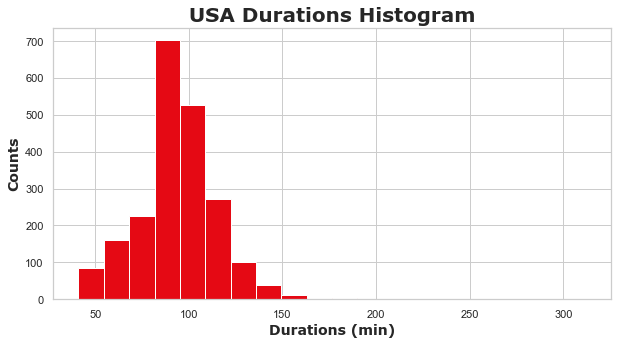

In [335]:
#Create USA Histogram
plt.figure(figsize=(10,5))
plt.hist(durations_usa, bins=20, color = "#E50914")
plt.title("USA Durations Histogram", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.show()

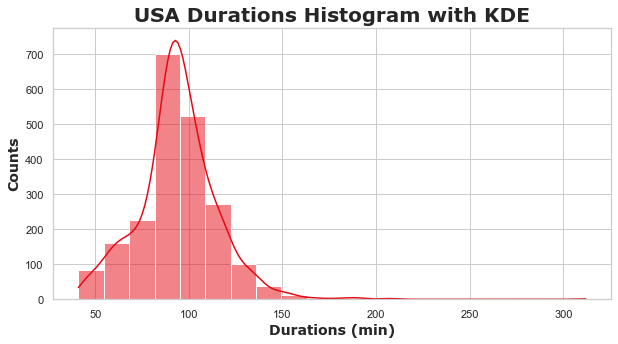

In [341]:
#USA Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(data= usa, x="duration", kde=True, bins=20, color = "#E50914")
plt.title("USA Durations Histogram with KDE", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("usa_kde.png")
plt.show()

In [160]:
#Contain Normal Test
st.normaltest(usa.duration)

NormaltestResult(statistic=480.78057888079087, pvalue=3.9794567857123466e-105)

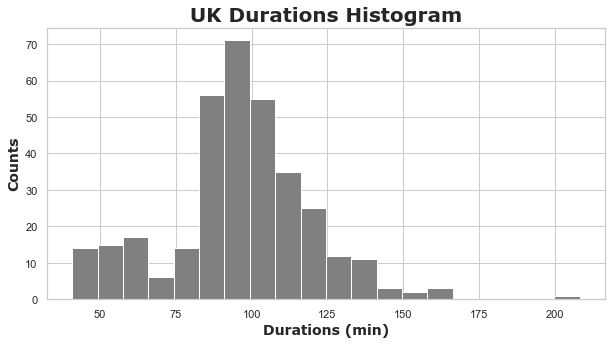

In [333]:
#UK Histogram
plt.figure(figsize=(10,5))
plt.hist(durations_uk, bins=20, color = "grey")
plt.title("UK Durations Histogram", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.show()

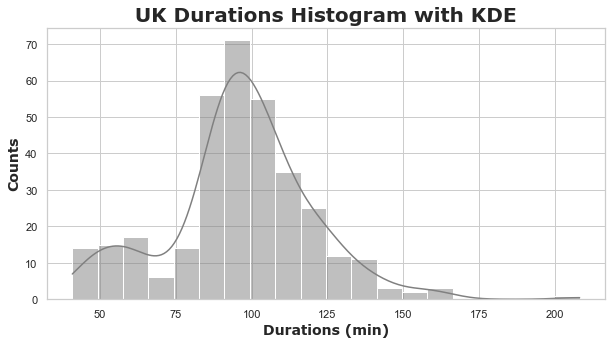

In [342]:
#UK Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(data=uk, x="duration", kde=True, bins=20, color = "grey")
plt.title("UK Durations Histogram with KDE", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("uk_kde.png")
plt.show()

In [161]:
#Conduct Normal Test
st.normaltest(uk.duration)

NormaltestResult(statistic=13.476484263720076, pvalue=0.0011847279226933865)

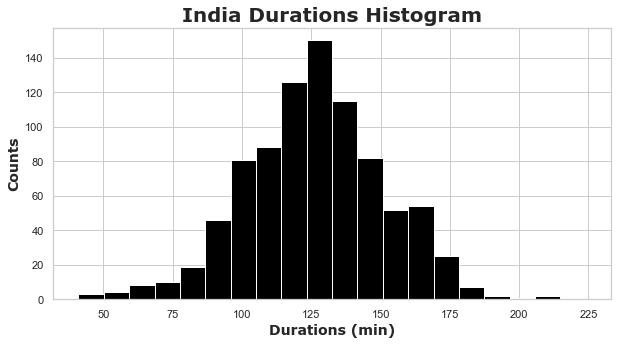

In [331]:
#India Histogram
plt.figure(figsize=(10,5))
plt.hist(durations_india, bins=20, color = "black")
plt.title("India Durations Histogram", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.show()

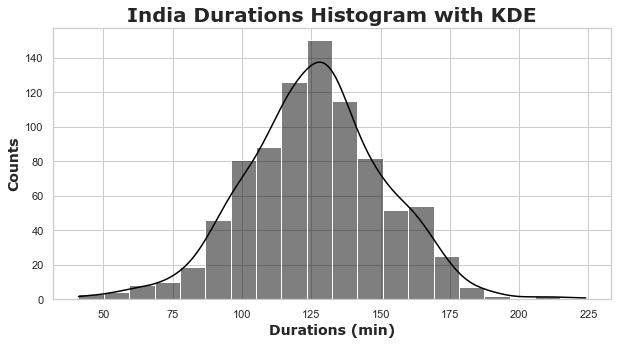

In [343]:
#India Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(data=india, x="duration", kde=True, bins=20, color = "black")
plt.title("India Durations Histogram with KDE", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Durations (min)', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Counts',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("india_kde.png")
plt.show()

In [162]:
#Conduct Normal Test
st.normaltest(india.duration)

NormaltestResult(statistic=7.50447633423336, pvalue=0.023465168071458535)

Text(103.125, 0.5, 'Durations (min)')

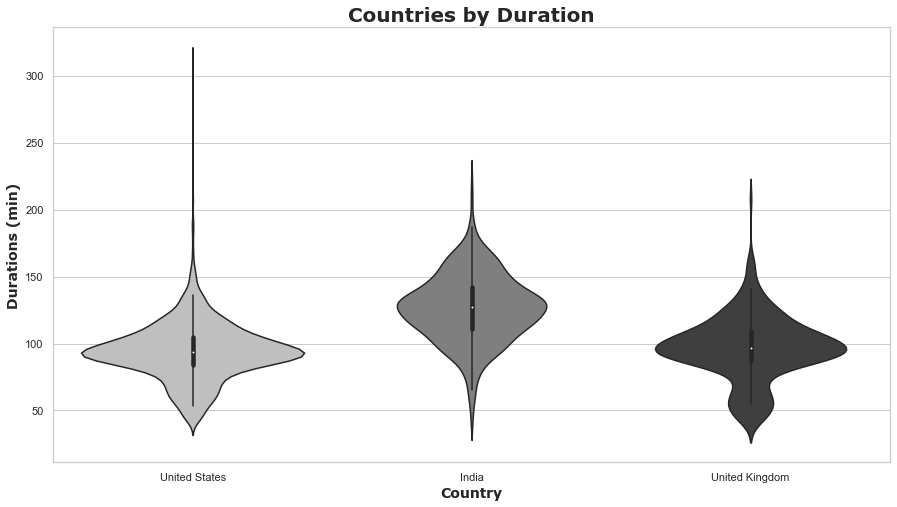

In [354]:
#Create Violin Plot
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="country", y="duration", data=df2,palette="binary")
plt.title("Countries by Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("countries_violin2.png")
plt.ylabel('Durations (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')

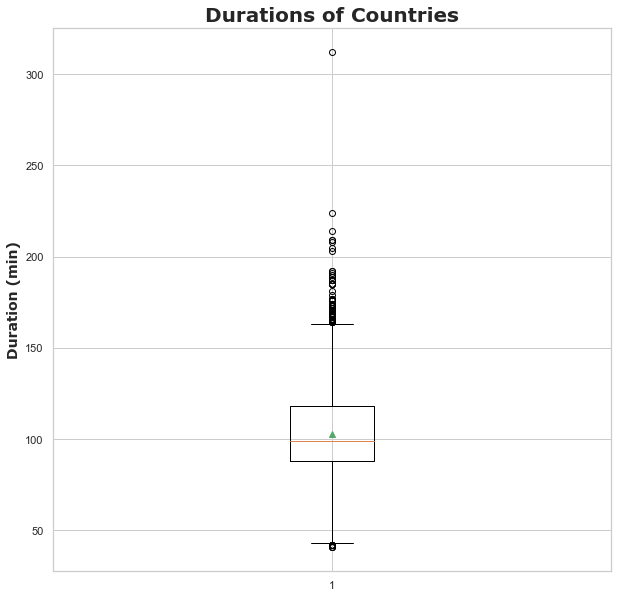

In [363]:
#Box Plot Duration of Countires
plt.figure(figsize=(10,10))
plt.boxplot(df2.duration, showmeans=True)
plt.title("Durations of Countries", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("countries_box.png")
plt.show()

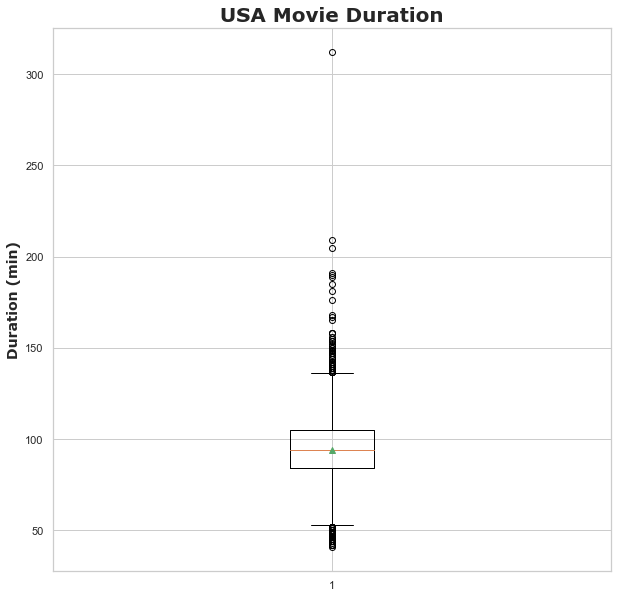

In [364]:
#Box Plot USA Durations
plt.figure(figsize=(10,10))
plt.boxplot(usa.duration, showmeans=True)
plt.title("USA Movie Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("usa_box.png")
plt.show()

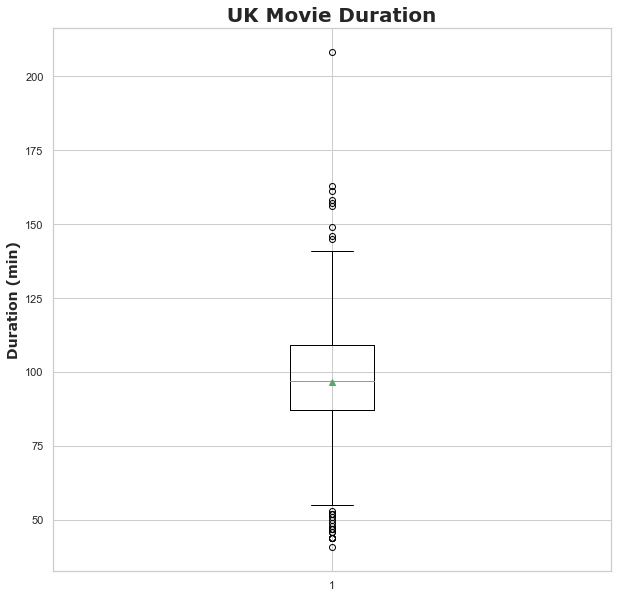

In [365]:
#Box Plot UK Durations
plt.figure(figsize=(10,10))
plt.boxplot(uk.duration, showmeans=True)
plt.title("UK Movie Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("uk_box.png")
plt.show()

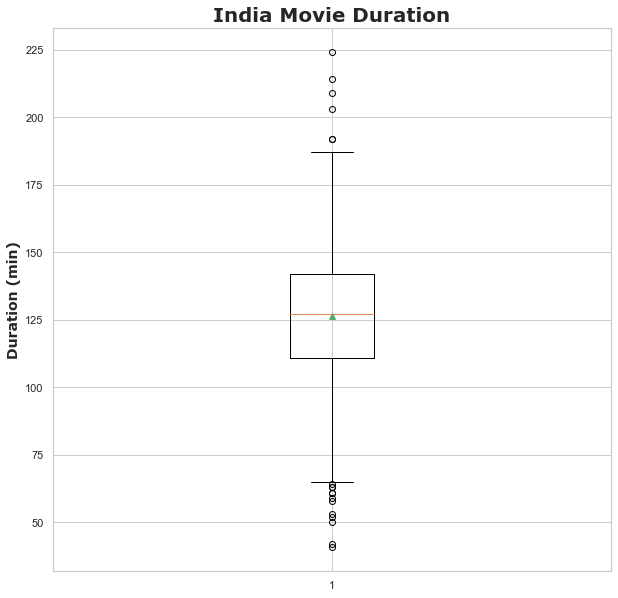

In [366]:
#Box Plot India Movie Durations
plt.figure(figsize=(10,10))
plt.boxplot(india.duration, showmeans=True)
plt.title("India Movie Duration", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("india_box.png")
plt.show()

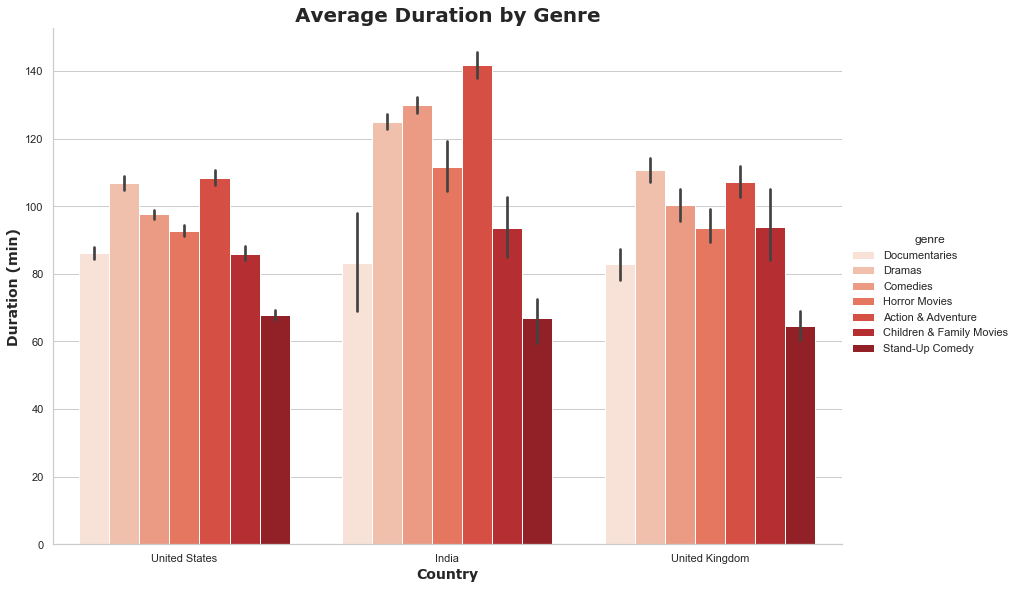

In [345]:
#Side by Side Bar Chart
sns.catplot(x = 'country', y='duration', hue = 'genre',data=df2, kind='bar', palette = "Reds", height=8, aspect=1.5)
plt.title("Average Duration by Genre", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("average_duration.png")
plt.show()


In [337]:
df2.duration.max()

312.0

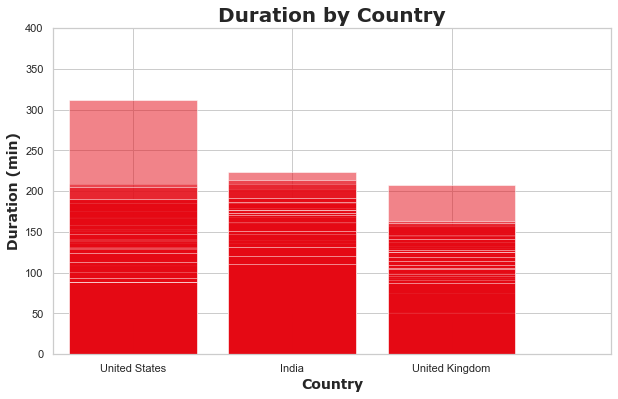

In [346]:
#Country by Duration Bar Chart
plt.figure(figsize=(10,6))
plt.bar(df2.country, df2.duration, color='#E50914', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 3)

# Sets the y limits of the current chart
plt.ylim(0, 400)

# Give our chart some labels and a tile
plt.title("Duration by Country", fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel('Country', fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel('Duration (min)',fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("duration_by_country_bar.png")
plt.show()

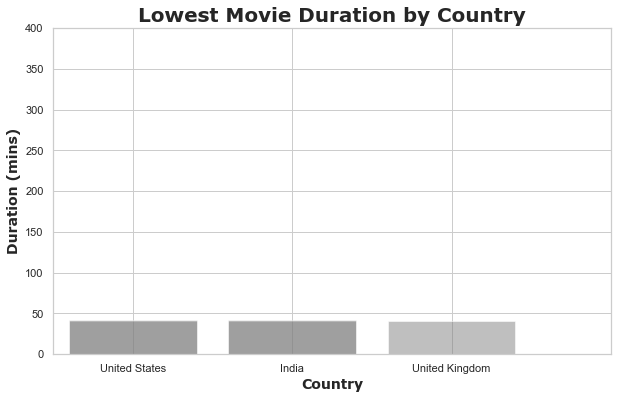

In [347]:
#Shortest Movie by Country
plt.figure(figsize=(10,6))
plt.bar(lowest_df.country, lowest_df.duration, color='grey', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 3)

# Sets the y limits of the current chart
plt.ylim(0, 400)

# Give our chart some labels and a tile
plt.title("Lowest Movie Duration by Country",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Country",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (mins)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.savefig("lowest.png")
plt.show()

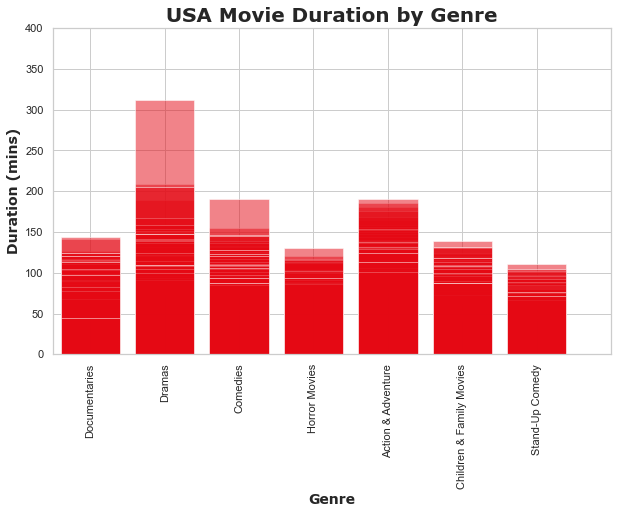

In [348]:
#USA Bar Chart
plt.figure(figsize=(10,6))
plt.bar(usa.genre, usa.duration, color='#E50914', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 7)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("USA Movie Duration by Genre",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Genre",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (mins)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("USA_duration_genre.png")
plt.show()

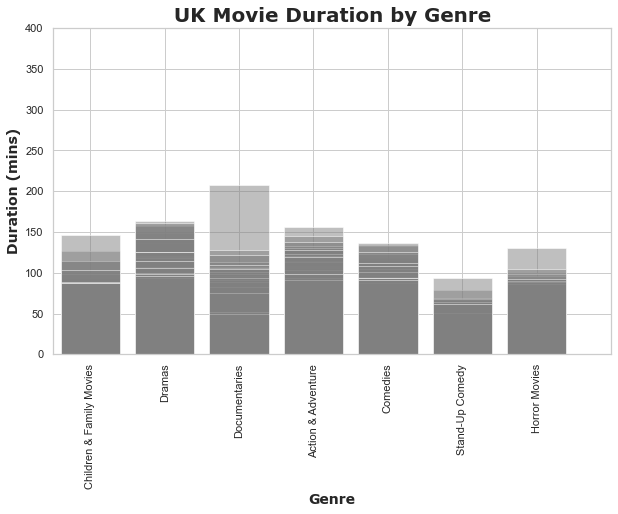

In [349]:
#UK Bar Chart
plt.figure(figsize=(10,6))
plt.bar(uk.genre, uk.duration, color='grey', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 7)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("UK Movie Duration by Genre",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Genre",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (mins)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("UK_genre_duration_bar.png")
plt.show()

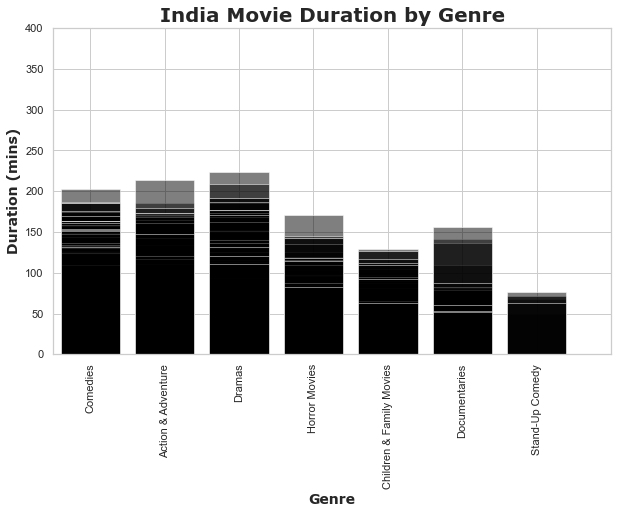

In [350]:
#India Bar Chart
plt.figure(figsize=(10,6))
plt.bar(india.genre, india.duration, color='black', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 7)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("India Movie Duration by Genre",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Genre",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (mins)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("india_duration_genre.png")
plt.show()

In [300]:
#Top 5 US
usa2 = us_df.head()
usa2

,show_id,title,release_year,type,rating,country,genre,duration
1333,s4254,Black Mirror: Bandersnatch,2018,Movie,R,United States,Dramas,312.0
1036,s3228,The Irishman,2019,Movie,R,United States,Dramas,209.0
3294,s8328,The Gospel of Luke,2015,Movie,PG-13,United States,Dramas,205.0
3538,s8765,Wyatt Earp,1994,Movie,PG-13,United States,Action & Adventure,191.0
801,s2544,Unbreakable Kimmy Schmidt: Kimmy vs. the Reverend,2020,Movie,PG-13,United States,Comedies,190.0


In [230]:
#Top 5 India
india2 = india_df.head()
india2

,show_id,title,release_year,type,rating,country,genre,duration
320,s1020,Lagaan,2001,Movie,PG,India,Dramas,224.0
1464,s4574,Jodhaa Akbar,2008,Movie,PG-13,India,Action & Adventure,214.0
871,s2732,Kabhi Khushi Kabhie Gham,2001,Movie,PG-13,India,Dramas,209.0
684,s2127,What's Your Raashee?,2009,Movie,PG,India,Comedies,203.0
870,s2731,Kabhi Alvida Naa Kehna,2006,Movie,PG-13,India,Dramas,192.0


In [231]:
#Top 5 UK
uk2 = uk_df.head()
uk2

,show_id,title,release_year,type,rating,country,genre,duration
833,s2633,No Direction Home: Bob Dylan,2005,Movie,R,United Kingdom,Documentaries,208.0
2139,s6145,American Honey,2016,Movie,R,United Kingdom,Dramas,163.0
3293,s8327,The Gospel of John,2014,Movie,PG-13,United Kingdom,Dramas,161.0
682,s2121,Les Misérables,2012,Movie,PG-13,United Kingdom,Dramas,158.0
1386,s4432,Dhan Dhana Dhan Goal,2007,Movie,PG-13,United Kingdom,Dramas,157.0


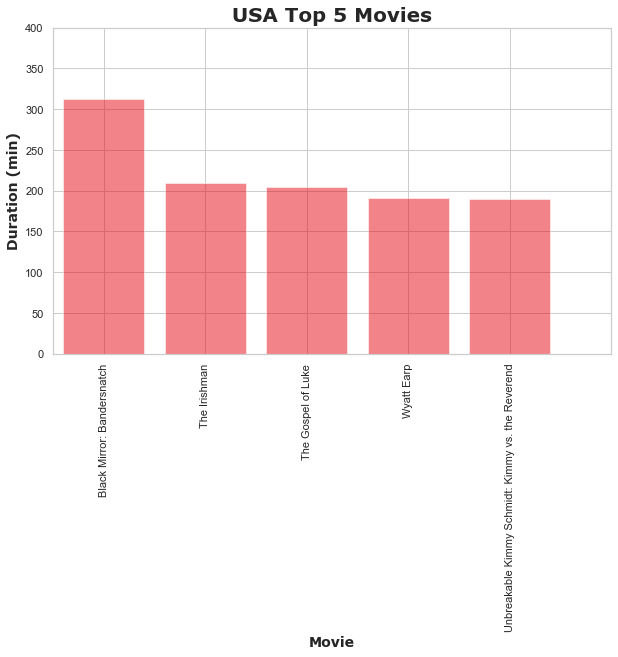

In [360]:
#Top 5 Bar Chart
plt.figure(figsize=(10,6))
plt.bar(usa2.title, usa2.duration, color='#E50914', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 5)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("USA Top 5 Movies",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Movie",fontname = "Verdana", fontsize=14, fontweight = 'bold')
plt.ylabel("Duration (min)",fontname = "Verdana", fontsize=14, fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("top_5_usa2.png")
plt.show()

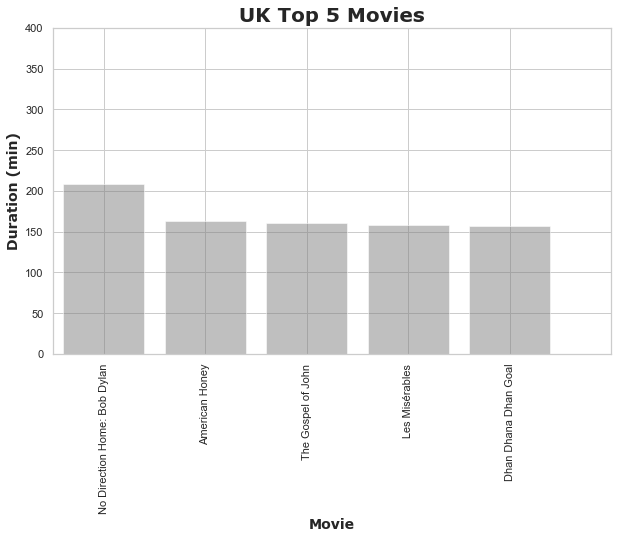

In [352]:
#Top 5 UK Bar Chart
plt.figure(figsize=(10,6))
plt.bar(uk2.title, uk2.duration, color='grey', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 5)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("UK Top 5 Movies",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Movie",fontname = "Verdana", fontsize=14, fontweight = 'bold')
plt.ylabel("Duration (min)",fontname = "Verdana", fontsize=14, fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("uk_top_5.png")
plt.show()

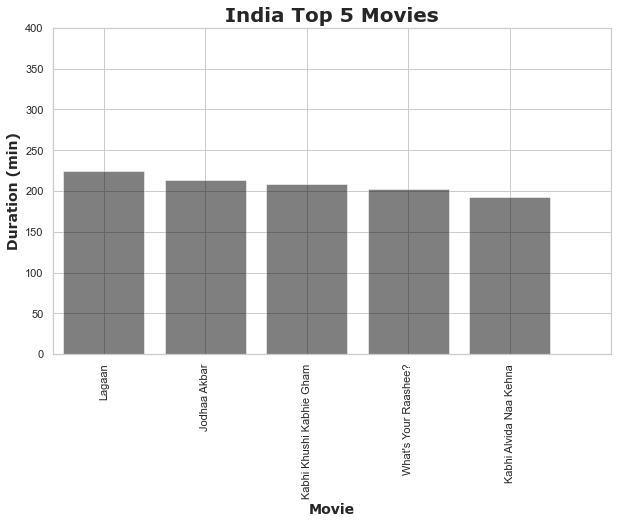

In [318]:
#Top 5 India Bar Chart
plt.figure(figsize=(10,6))
plt.bar(india2.title, india2.duration, color='black', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 5)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("India Top 5 Movies",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Movie",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (min)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("india_top_5.png")
plt.show()

In [319]:
df4 = df3.head()

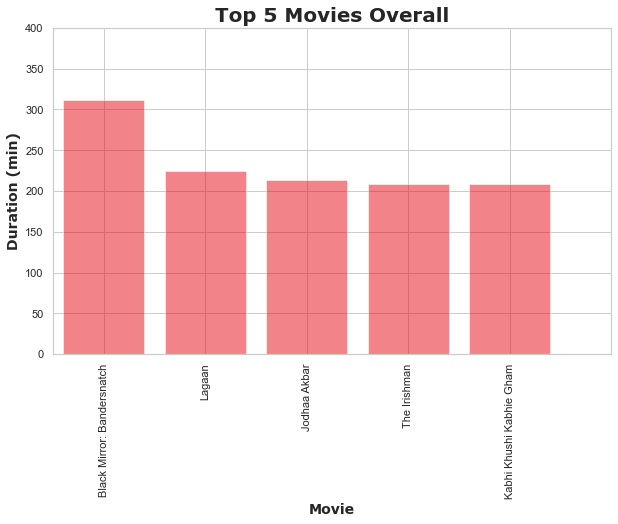

In [353]:
plt.figure(figsize=(10,6))
plt.bar(df4.title, df4.duration, color='#E50914', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.5, 5)

# Sets the y limits of the current chart
plt.ylim(0,400)
# Give our chart some labels and a tile
plt.title("Top 5 Movies Overall",fontweight = 'bold', fontname = "Verdana", fontsize=20)
plt.xlabel("Movie",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.ylabel("Duration (min)",fontname = "Verdana", fontsize=14,fontweight = 'bold')
plt.xticks(rotation=90)
plt.savefig("top_5_overall.png")
plt.show()